In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from communitygraph import bipartite as bp
from communitygraph import util
from collections import Counter
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()

'/raid/home/myang349/mitigating-filter-bubbles-final/twitch_preprocessing'

In [4]:
PATH = os.path.join(os.getcwd(), 'raw_data/100k_a.csv')

In [5]:
df = pd.read_csv(PATH, names=['user_id', 'stream_id', 'streamer_name', 'start_time', 'stop_time'])

In [26]:
df=df[['user_id', 'streamer_name', 'start_time', 'stop_time']]

In [6]:
df.head()

,user_id,stream_id,streamer_name,start_time,stop_time
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


In [28]:
data = util.optimize_modularity(df, 'user_id', 'streamer_name', [10, 25, 100, 300, 500, 1000])

Starting search over: 
 - min_item_degree: [10, 25, 100, 300, 500, 1000]
 - resolution: [1.0]



KeyboardInterrupt: 

# Twitch analysis

In [22]:
twitch5 = bp.BipartiteCommunity(df, 'user_id', 'streamer_name', min_item_degree=5)
twitch10 = bp.BipartiteCommunity(df, 'user_id', 'streamer_name', min_item_degree=10)
twitch50 = bp.BipartiteCommunity(df, 'user_id', 'streamer_name', min_item_degree=50)
twitch200 = bp.BipartiteCommunity(df, 'user_id', 'streamer_name', min_item_degree=200)
twitch500 = bp.BipartiteCommunity(df, 'user_id', 'streamer_name', min_item_degree=500)
twitch2000 = bp.BipartiteCommunity(df, 'user_id', 'streamer_name', min_item_degree=2000)

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.



In [25]:
part5=part

In [23]:
part = twitch5.partition_items()

Starting partition of items with resolution 1.0...
Starting weighted projection...
Finished weighted projection in 567.4791765213013

Finished partition in 840.8437242507935


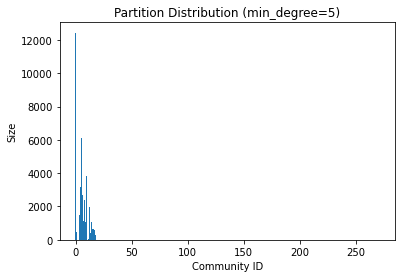

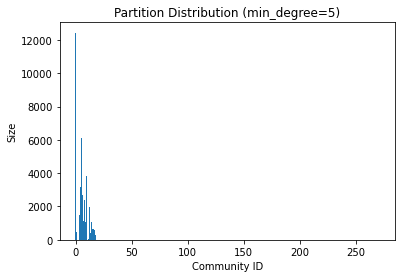

In [42]:
plot_partition_distribution2(part5, k=5)

In [26]:
part50 = twitch50.partition_items()

Starting partition of items with resolution 1.0...
Starting weighted projection...
Finished weighted projection in 292.0493404865265

Finished partition in 346.83018612861633


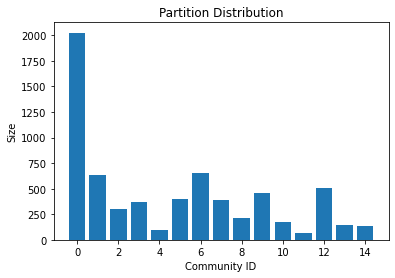

In [28]:
kek = util.plot_partition_distribution(part50)

In [31]:
part200 = twitch200.partition_items()

Starting partition of items with resolution 1.0...
Starting weighted projection...
Finished weighted projection in 131.27062845230103

Finished partition in 140.51227283477783


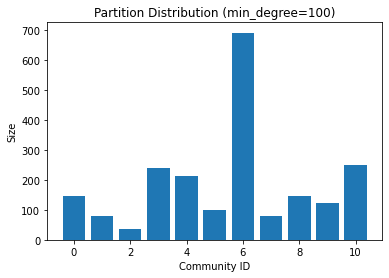

In [40]:
kek = plot_partition_distribution2(part200, 100)

In [37]:
def plot_partition_distribution2(partition: dict[str, int], k) -> plt.Figure:
    """Plots a histogram from dict"""
    counts = Counter(partition.values())
    fig = plt.figure()

    # Creating the barplot
    plt.bar(counts.keys(), counts.values())
    plt.xlabel("Community ID")
    plt.ylabel("Size")
    plt.title(f"Partition Distribution (min_degree={k})")
    return fig